In [1]:
import numpy as np
import pandas as pd
from Project1_funcs import *
import matplotlib.pyplot as plt
dataset = pd.read_csv('Live.csv')
df = pd.DataFrame(dataset)

In [2]:
our_data = pd.get_dummies(df, columns = ['status_type'])

In [3]:
fixed_data = our_data.drop(['status_id', 'status_published','num_loves','num_wows', 'num_hahas',
'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3', 'Column4'], axis
= 1)

In [4]:
fixed_data

,num_reactions,num_comments,num_shares,num_likes,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,0,0,0,1
1,150,0,0,150,0,1,0,0
2,227,236,57,204,0,0,0,1
3,111,0,0,111,0,1,0,0
4,213,0,0,204,0,1,0,0
...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,1,0,0
7046,16,0,0,14,0,1,0,0
7047,2,0,0,1,0,1,0,0
7048,351,12,22,349,0,1,0,0


In [5]:
np_fixed_data = fixed_data.to_numpy()

In [6]:
np_fixed_data

array([[529, 512, 262, ...,   0,   0,   1],
       [150,   0,   0, ...,   1,   0,   0],
       [227, 236,  57, ...,   0,   0,   1],
       ...,
       [  2,   0,   0, ...,   1,   0,   0],
       [351,  12,  22, ...,   1,   0,   0],
       [ 17,   0,   0, ...,   1,   0,   0]])

In [7]:
np_fixed_data_t = np_fixed_data.transpose()

In [8]:
col_means(np_fixed_data_t)

array([2.30117163e+02, 2.24356028e+02, 4.00225532e+01, 2.15043121e+02,
       8.93617021e-03, 6.08226950e-01, 5.17730496e-02, 3.31063830e-01])

In [9]:
x = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]])

In [10]:
np_fixed_data_t

array([[529, 150, 227, ...,   2, 351,  17],
       [512,   0, 236, ...,   0,  12,   0],
       [262,   0,  57, ...,   0,  22,   0],
       ...,
       [  0,   1,   0, ...,   1,   1,   1],
       [  0,   0,   0, ...,   0,   0,   0],
       [  1,   0,   1, ...,   0,   0,   0]])

In [11]:
cm = covar_mat(np_fixed_data_t)

In [12]:
cm_df = pd.DataFrame(cm)

In [13]:
cm_df

,0,1,2,3,4,5,6,7
0,214022.176652,62082.188810,15264.356557,206881.667525,1.251471,-29.702000,10.804828,17.645700
1,62082.188810,791453.670644,75003.376988,40661.305968,-1.954239,-126.749702,-9.740807,138.444748
2,15264.356557,75003.376988,17318.550917,10202.991934,-0.318403,-22.792695,-1.939883,25.050980
3,206881.667525,40661.305968,10202.991934,202025.399758,1.381513,-22.060278,11.416834,9.261932
4,1.251471,-1.954239,-0.318403,1.381513,0.008858,-0.005436,-0.000463,-0.002959
5,-29.702000,-126.749702,-22.792695,-22.060278,-0.005436,0.238321,-0.031494,-0.201391
6,10.804828,-9.740807,-1.939883,11.416834,-0.000463,-0.031494,0.049100,-0.017143
7,17.645700,138.444748,25.050980,9.261932,-0.002959,-0.201391,-0.017143,0.221492


In [14]:
num_attrs = fixed_data.iloc[:,0:4]

In [15]:
num_attrs

,num_reactions,num_comments,num_shares,num_likes
0,529,512,262,432
1,150,0,0,150
2,227,236,57,204
3,111,0,0,111
4,213,0,0,204
...,...,...,...,...
7045,89,0,0,89
7046,16,0,0,14
7047,2,0,0,1
7048,351,12,22,349


In [16]:
rnorm_num_attrs = range_norm(num_attrs.to_numpy().transpose())

In [17]:
rnorm_num_attrs

array([[0.11231423, 0.03184713, 0.04819533, ..., 0.00042463, 0.07452229,
        0.00360934],
       [0.02439257, 0.        , 0.01124345, ..., 0.        , 0.0005717 ,
        0.        ],
       [0.07651869, 0.        , 0.0166472 , ..., 0.        , 0.00642523,
        0.        ],
       [0.09171975, 0.03184713, 0.0433121 , ..., 0.00021231, 0.07409766,
        0.00360934]])

In [18]:
pd.DataFrame(rnorm_num_attrs.transpose())

,0,1,2,3
0,0.112314,0.024393,0.076519,0.091720
1,0.031847,0.000000,0.000000,0.031847
2,0.048195,0.011243,0.016647,0.043312
3,0.023567,0.000000,0.000000,0.023567
4,0.045223,0.000000,0.000000,0.043312
...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896
7046,0.003397,0.000000,0.000000,0.002972
7047,0.000425,0.000000,0.000000,0.000212
7048,0.074522,0.000572,0.006425,0.074098


In [19]:
r_norm_cov_mat = covar_mat(rnorm_num_attrs)

In [20]:
pd.DataFrame(r_norm_cov_mat)

,0,1,2,3
0,0.009648,0.000628,0.000947,0.009326
1,0.000628,0.001796,0.001044,0.000411
2,0.000947,0.001044,0.001477,0.000633
3,0.009326,0.000411,0.000633,0.009107


In [21]:
print("The greatest sample covariance of the range-normalized attributes is: " + str(r_norm_cov_mat[0,3]))

The greatest sample covariance of the range-normalized attributes is: 0.009325673231044529


Text(0, 0.5, 'Range Normalized Number of Reactions')

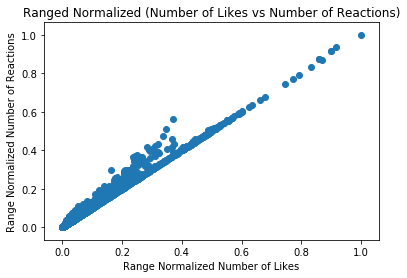

In [22]:
plt.scatter(rnorm_num_attrs.transpose()[:,3], rnorm_num_attrs.transpose()[:,0])
plt.title('Ranged Normalized (Number of Likes vs Number of Reactions)')
plt.xlabel('Range Normalized Number of Likes')
plt.ylabel('Range Normalized Number of Reactions')

In [23]:
znorm_num_attrs = stand_norm(num_attrs.to_numpy().transpose())

In [24]:
znorm_num_attrs

array([[ 0.64605812, -0.17317938, -0.00673799, ..., -0.4930927 ,
         0.2612975 , -0.46066905],
       [ 0.32332741, -0.25218834,  0.01308846, ..., -0.25218834,
        -0.23869968, -0.25218834],
       [ 1.68675916, -0.30412282,  0.12900799, ..., -0.30412282,
        -0.13694953, -0.30412282],
       [ 0.48269237, -0.14470995, -0.02456908, ..., -0.47620975,
         0.29803141, -0.44061246]])

In [25]:
pd.DataFrame(znorm_num_attrs.transpose())

,0,1,2,3
0,0.646058,0.323327,1.686759,0.482692
1,-0.173179,-0.252188,-0.304123,-0.144710
2,-0.006738,0.013088,0.129008,-0.024569
3,-0.257481,-0.252188,-0.304123,-0.231478
4,-0.037000,-0.252188,-0.304123,-0.024569
...,...,...,...,...
7045,-0.305036,-0.252188,-0.304123,-0.280425
7046,-0.462831,-0.252188,-0.304123,-0.447287
7047,-0.493093,-0.252188,-0.304123,-0.476210
7048,0.261298,-0.238700,-0.136950,0.298031


In [26]:
z_norm_corr_mat = corr_mat(znorm_num_attrs)

In [27]:
pd.DataFrame(z_norm_corr_mat)

,0,1,2,3
0,1.000000,0.150843,0.250723,0.994923
1,0.150843,1.000000,0.640637,0.101687
2,0.250723,0.640637,1.000000,0.172492
3,0.994923,0.101687,0.172492,1.000000


In [28]:
print("The greatest correlation of the Z-score-normalized attributes is: " + str(z_norm_corr_mat[0,3]) + " belonging to num_reactions and num_likes.")

The greatest correlation of the Z-score-normalized attributes is: 0.9949233703318691 belonging to num_reactions and num_likes.


Text(0, 0.5, 'Z-Score Normalized Number of Reactions')

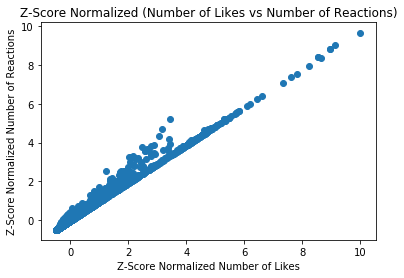

In [29]:
plt.scatter(znorm_num_attrs.transpose()[:,3], znorm_num_attrs.transpose()[:,0])
plt.title('Z-Score Normalized (Number of Likes vs Number of Reactions)')
plt.xlabel('Z-Score Normalized Number of Likes')
plt.ylabel('Z-Score Normalized Number of Reactions')

In [30]:
print("The smallest correlation of the Z-score-normalized attributes is: " + str(z_norm_corr_mat[1,3]) + " belonging to num_comments and num_likes.")

The smallest correlation of the Z-score-normalized attributes is: 0.10168703564349828 belonging to num_comments and num_likes.


In [31]:
print("Two of the six correlation pairs are greater than or equal to 0.5.")

Two of the six correlation pairs are greater than or equal to 0.5.


In [32]:
cov_mat = covar_mat(num_attrs.to_numpy().transpose())

In [33]:
pd.DataFrame(cov_mat)

,0,1,2,3
0,214022.176652,62082.188810,15264.356557,206881.667525
1,62082.188810,791453.670644,75003.376988,40661.305968
2,15264.356557,75003.376988,17318.550917,10202.991934
3,206881.667525,40661.305968,10202.991934,202025.399758


In [34]:
print("No pairs of features have a negative sample covariance")

No pairs of features have a negative sample covariance


In [35]:
num_attrs_np = num_attrs.to_numpy().transpose()

In [36]:
total_vari = tot_var(num_attrs_np)

In [38]:
print("The total variance is: " + str(total_vari))

The total variance is: 1224819.7979709515


In [40]:
print("The total variance, restricted to five features (we only have four anyway) is: " + str(total_vari))

The total variance, restricted to five features (we only have four anyway) is: 1224819.7979709515
